In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

auto_mpg_df = pd.read_table('auto-mpg.data-original.csv', delimiter=',').dropna().sample(frac=1) #.reset_index(drop=True)
auto_mpg_df.to_csv('auto-mpg.data-original2.csv')
auto_mpg_df.head()

In [55]:
auto_mpg_df = pd.read_table('auto-mpg.data-original2.csv', delimiter=',')
auto_mpg_df = auto_mpg_df.drop('Unnamed: 0', 1)
auto_mpg_df.head()

,MPG,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
0,12.0,8,400.0,167.0,4906,12.5,73,1,ford country
1,28.0,4,116.0,90.0,2123,14.0,71,2,opel 1900
2,39.4,4,85.0,70.0,2070,18.6,78,3,datsun b210 gx
3,23.8,4,151.0,85.0,2855,17.6,78,1,oldsmobile starfire sx
4,23.0,4,140.0,78.0,2592,18.5,75,1,pontiac astro


In [56]:
Origin = pd.DataFrame(auto_mpg_df['Origin'].where(auto_mpg_df['Origin'] != 1, 'North America'))
Origin = Origin.where(Origin != 2, 'Europe')
Origin = Origin.where(Origin != 3, 'Asia')
auto_mpg_df2 = auto_mpg_df.drop('Cylinders', 1)
auto_mpg_df2['Origin'] = Origin 

sns.pairplot(auto_mpg_df2, kind='scatter', hue='Origin', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.savefig('autompg_expolatory.png', bbox_inches='tight')
plt.show()

In [57]:
auto_mpg_df = auto_mpg_df.drop([121, 129, 204])
auto_mpg_df['Engin'] = auto_mpg_df['Displacement'] * auto_mpg_df['Cylinders']
auto_mpg_df = auto_mpg_df.drop(['Weight', 'Displacement'], 1)

In [58]:
#applying a non-linear transformation function to a feature
#auto_mpg_df['Displacement'] = np.log(auto_mpg_df['Displacement'])
#auto_mpg_df['Weight'] = np.log(auto_mpg_df['Weight'])
auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
auto_mpg_df['Engin'] = np.log(auto_mpg_df['Engin'])
auto_mpg_df['horsepower'] = np.log(auto_mpg_df['horsepower'])

plt.subplots(figsize=(25,20)) 
sns.heatmap(auto_mpg_df.corr(), annot=True, vmin=0, vmax=1) 
plt.show()

In [59]:
#Drop all the cylinder 3 and 5 data because we don't have enough of them to make good prediction for them
cy5 = auto_mpg_df[auto_mpg_df['Cylinders'] == 5]
cy3 = auto_mpg_df[auto_mpg_df['Cylinders'] == 3]
#my71 = auto_mpg_df[auto_mpg_df['Model_Year'] == 71]
cytodrop = pd.concat([cy3, cy5])
cyindex = cytodrop.index.values
auto_mpg_df = auto_mpg_df.drop(cyindex)

In [60]:
# Create a set of dummy variables from the sex variable
df_Cylinders = pd.get_dummies(auto_mpg_df['Cylinders'])
#df_Model_Year = pd.get_dummies(auto_mpg_df['Model_Year'])
df_Origin = pd.get_dummies(auto_mpg_df['Origin'])

# Join the dummy variables to the main dataframe
auto_mpg_df = pd.concat([auto_mpg_df, df_Cylinders, df_Origin], axis=1)
auto_mpg_df = auto_mpg_df.drop(['Cylinders', 'Origin'], 1).drop('Car Name', 1)
auto_mpg_df.head()

,MPG,horsepower,Acceleration,Model_Year,Engin,4,6,8,1,2,3
0,2.484907,5.117994,12.5,73,8.070906,0,0,1,1,0,0
1,3.332205,4.499810,14.0,71,6.139885,1,0,0,0,1,0
2,3.673766,4.248495,18.6,78,5.828946,1,0,0,0,0,1
3,3.169686,4.442651,17.6,78,6.403574,1,0,0,1,0,0
4,3.135494,4.356709,18.5,75,6.327937,1,0,0,1,0,0


In [61]:
X = auto_mpg_df.drop('MPG', 1)
y = auto_mpg_df['MPG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=20)

# OLS regression

In [62]:
regr = linear_model.LinearRegression()
regr.fit(X_train2, y_train2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test2, y_test2))

#Looks very good
k = cross_val_score(regr, X, y, cv=5)
k.sort()
k


Coefficients: 
 [-0.50983001 -0.02838541  0.02662433 -0.19960601 -0.02956603 -0.01546803
  0.04503406 -0.02531642 -0.00722392  0.03254034]

Intercept: 
 5.23265505879

R-squared:
0.881677325371


array([ 0.86378288,  0.88234551,  0.8837266 ,  0.88735642,  0.90444042])

In [63]:
max(k) -min(k)

0.040657540952818594

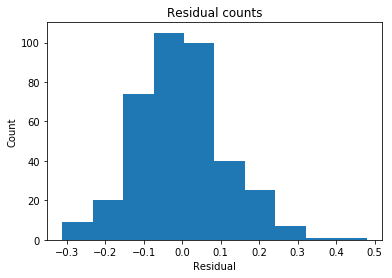

In [64]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

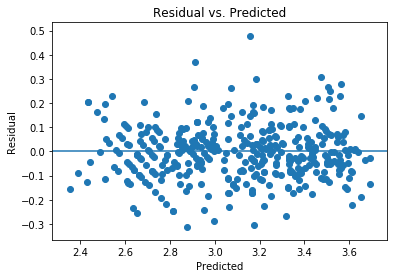

0.790230745568


In [65]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# Lasso regression

In [103]:
lass = linear_model.Lasso(alpha=8.0228537978002239e-05)
lass.fit(X_train2, y_train2)

print('R² for the model with few features:')
print(lass.score(X_test2, y_test2))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter estimates for the model with few features:')
print(str(origparams) + '\n')

k = cross_val_score(lass, X, y, cv=5)
k.sort()
k

R² for the model with few features:
0.881614005923

Parameter estimates for the model with few features:
[ -5.09229141e-01  -2.82578466e-02   2.66245480e-02  -1.90528515e-01
  -4.28641017e-03   0.00000000e+00   5.37157502e-02  -1.90696126e-02
  -0.00000000e+00   3.97504019e-02   5.14075517e+00]



array([ 0.86437477,  0.88152292,  0.8842141 ,  0.8874949 ,  0.90450763])

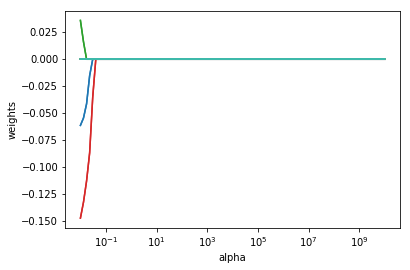

In [90]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train2), y_train2)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [94]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train2, y_train2)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train2, y_train2)
mean_squared_error(y, lasso.predict(X))

0.0128035557930441

In [104]:
max(k) -min(k)

0.040132858607863642

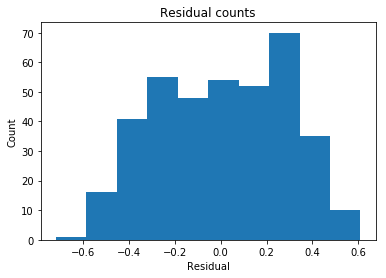

In [105]:
# Extract predicted values.
predicted = lassfit.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

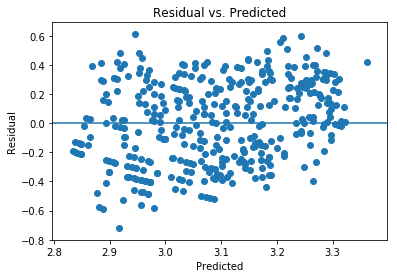

1.32894328717


In [106]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

alphanum = np.arange(0.05, 2, 0.05)
r2 = []
r2max = []
for x in alphanum:
    lassloop = linear_model.Lasso(alpha=x)
    lassloop.fit(X_train2, y_train2)
    crossval = cross_val_score(lassloop, X_test2, y_test2, cv=5)
    crossmax = max(crossval)
    crossmin = min(crossval)
    r2.append(100*(crossmax-crossmin))
    r2max.append(crossmax)

print(min(r2))

# ridge regression

In [82]:
#ridgeregr = linear_model.Ridge(alpha=5, fit_intercept=True)
ridgeregr = Ridge(alpha=0.005, normalize = True)
ridgeregr.fit(X_train2, y_train2)
print(ridgeregr.score(X_test2, y_test2))
print('Cross Validation')
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with few features:')
print(str(origparams) + '\n')
k = cross_val_score(ridgeregr, X, y, cv=5)
k.sort()
k

0.880966917799
Cross Validation

Parameter estimates for the model with few features:
[ -5.08837060e-01  -2.76545337e-02   2.65210828e-02  -1.70493043e-01
  -4.22204178e-03  -1.90274872e-02   2.19703866e-02  -2.50125420e-02
  -1.76179026e-03   3.96336054e-02   5.01768206e+00]



array([ 0.86576326,  0.87886679,  0.88530691,  0.88722718,  0.90421599])

In [83]:
max(k) -min(k)

0.038452733859136945

In [84]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
coefs = []

for a in alphas:
    ridgeregr.set_params(alpha = a)
    ridgeregr.fit(X_train2, y_train2)
    coefs.append(ridgeregr.coef_)
    

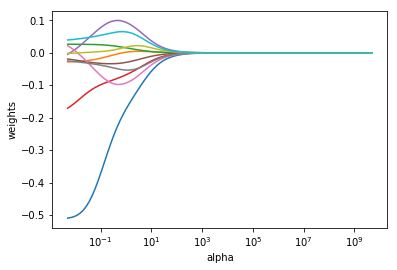

In [85]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [86]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train2, y_train2)
ridgecv.alpha_

0.0050000000000000001

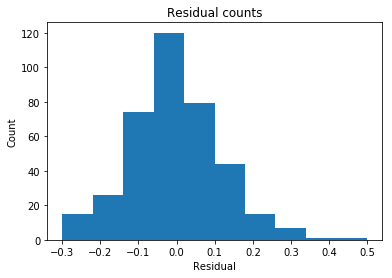

In [19]:
# Extract predicted values.
predicted = ridgeregr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

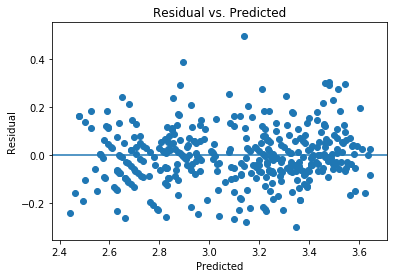

0.797398617738


In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# SVM

In [21]:
svr = SVR()

svr.fit(X_train2, y_train2)
print(ridgeregr.score(X_test2, y_test2))
print('Cross Validation')
k = cross_val_score(ridgeregr, X, y, cv=5)
k.sort()
k

0.885568354663
Cross Validation


array([ 0.85820354,  0.86808363,  0.88117441,  0.88221406,  0.89669855])

In [22]:
max(k) -min(k)

0.038495004655795695

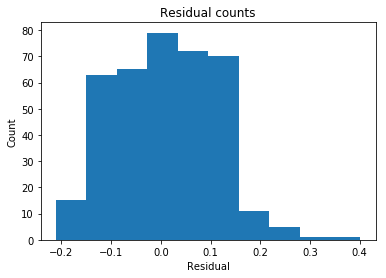

In [23]:
# Extract predicted values.
predicted = svr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

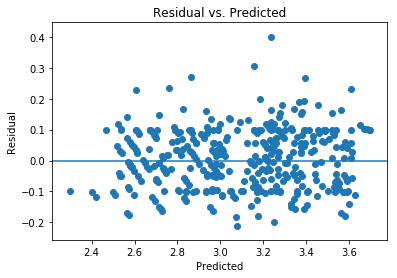

0.61219501396


In [24]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# End of model

4    199
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64


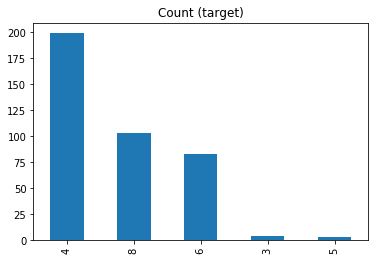

In [33]:
target_count = auto_mpg_df.Cylinders.value_counts()

print(target_count)
#print('Class 1:', target_count[1])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
plt.savefig('autompg_cylinder_count.png', bbox_inches='tight')
plt.show() 

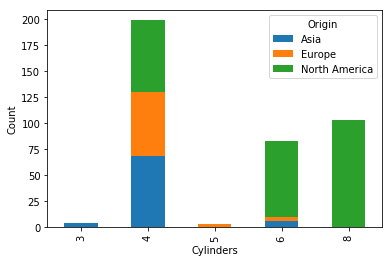

In [60]:
auto_mpg_df2.groupby(['Cylinders', 'Origin'])['MPG'].size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.savefig('autompg_cylinder_count.png', bbox_inches='tight')
plt.show()

4    199
8    103
6     83
Name: Cylinders, dtype: int64


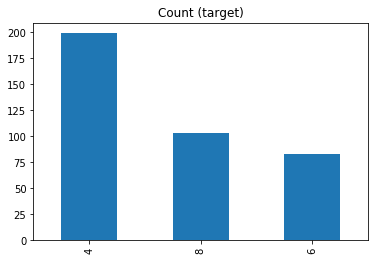

In [36]:
target_count = auto_mpg_df.Cylinders.value_counts()

print(target_count)
#print('Class 1:', target_count[1])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
plt.show()

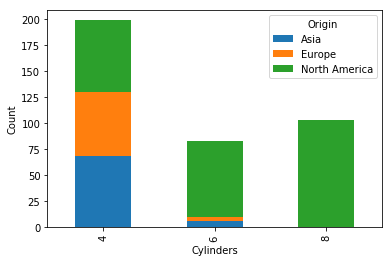

In [69]:
auto_mpg_df2.groupby(['Cylinders', 'Origin'])['MPG'].size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.savefig('autompg_cylinder_count2.png', bbox_inches='tight')
plt.show()